Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
reading band 1 of 12
Band Type:  6
Max value in band 0  is  0.16581403
reading band 2 of 12
Band Type:  6
Max value in band 1  is  0.220572
reading band 3 of 12
Band Type:  6
Max value in band 2  is  0.23695904
reading band 4 of 12
Band Type:  6
Max value in band 3  is  0.29423693
reading band 5 of 12
Band Type:  6
Max value in band 4  is  0.2196646
reading band 6 of 12
Band Type:  6
Max value in band 5  is  0.12746935
reading band 7 of 12
Band Type:  6
Max v

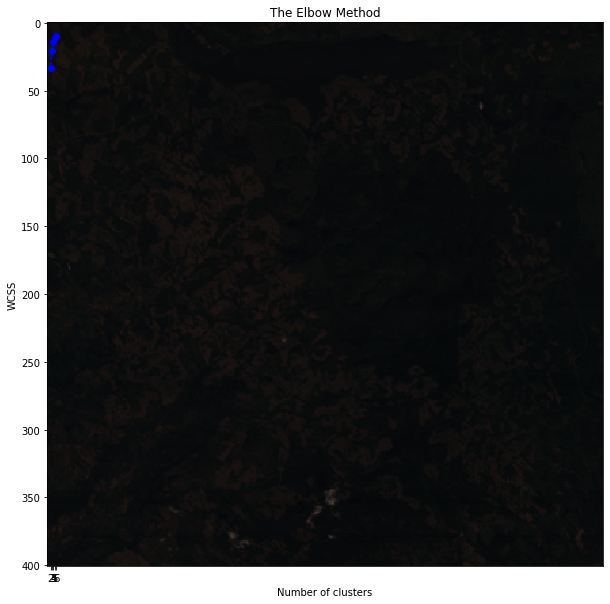

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


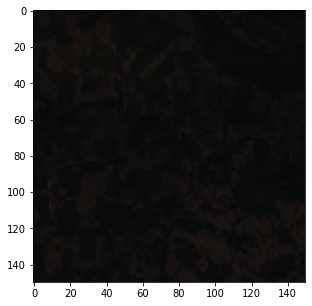

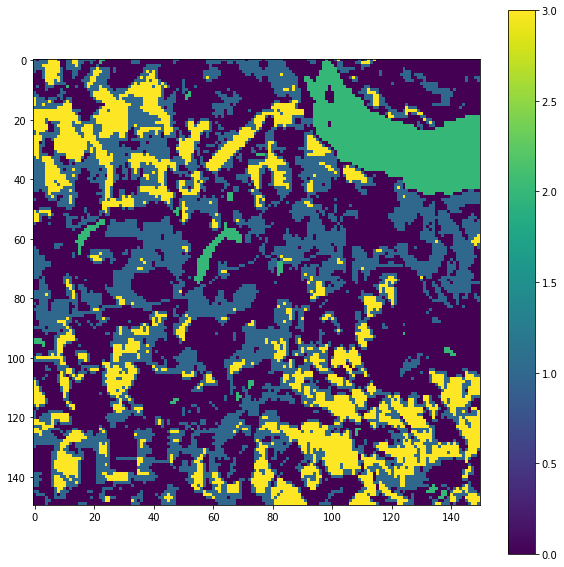

Number of clusters found:  None
Labels:  [1 0 1 ... 3 3 1]
Number of leaves:  22500
Number of connected components:  1
X start reached  150
X end reached  300
Number of rows in the cropped image:  150
Number of columns in the cropped image:  150
Number of bands in the cropped image:  12
(22500, 12)


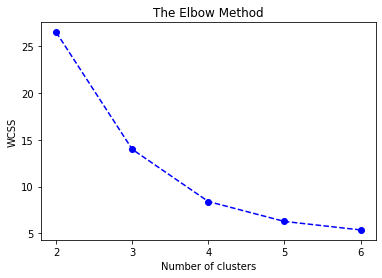

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


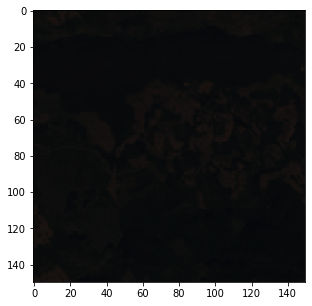

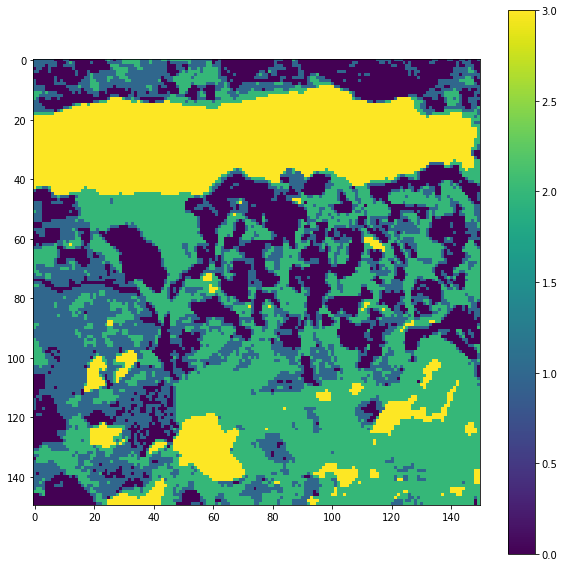

Number of clusters found:  None
Labels:  [1 1 1 ... 2 0 2]
Number of leaves:  22500
Number of connected components:  1
Y star reached  150
Y end reached  300
X start reached  0
X end reached  150
Number of rows in the cropped image:  150
Number of columns in the cropped image:  150
Number of bands in the cropped image:  12
(22500, 12)


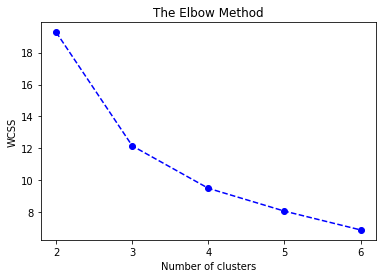

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


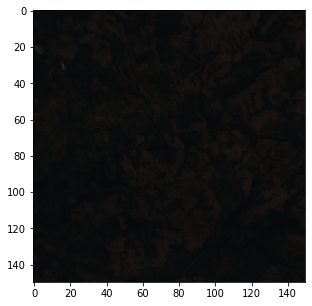

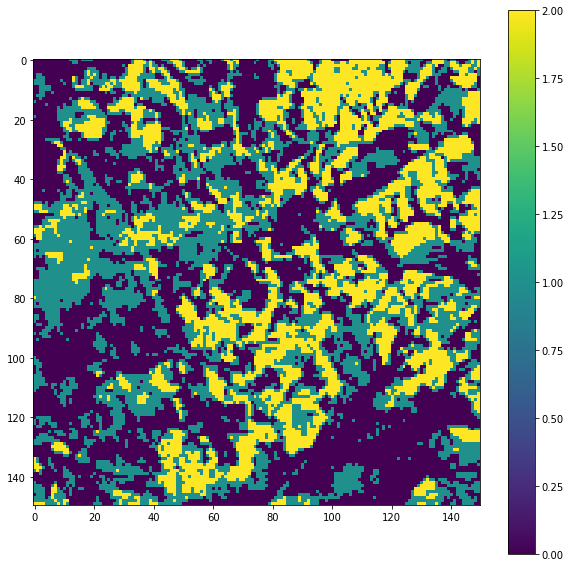

Number of clusters found:  None
Labels:  [0 0 0 ... 1 0 0]
Number of leaves:  22500
Number of connected components:  1
X start reached  150
X end reached  300
Number of rows in the cropped image:  150
Number of columns in the cropped image:  150
Number of bands in the cropped image:  12
(22500, 12)


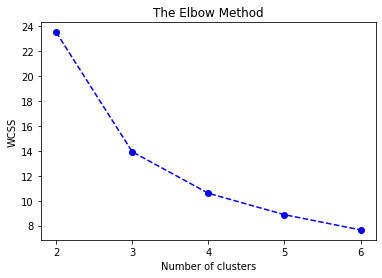

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


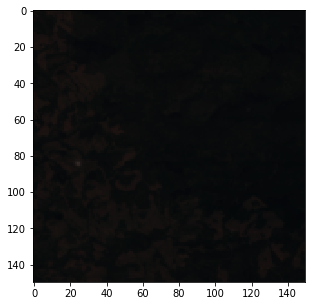

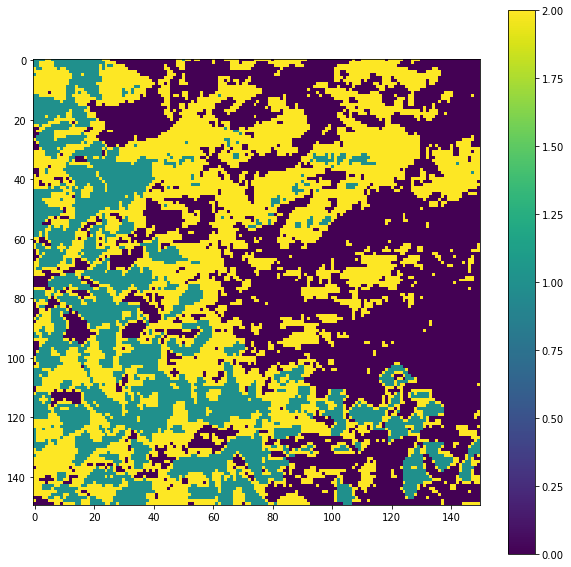

Number of clusters found:  None
Labels:  [1 1 1 ... 2 2 2]
Number of leaves:  22500
Number of connected components:  1
Total number of different clustered cropped images we got:  4
Starting creating the color map
data length:  4
Cropped_Images shape:    (150, 150, 12)
[[  0   1]
 [  0   9]
 [  0  10]
 ...
 [149 143]
 [149 144]
 [149 145]]
0  hello
Total number of indexes or values in given cluster:  10610
[[  0   0]
 [  0   2]
 [  0   3]
 ...
 [149 141]
 [149 146]
 [149 149]]
1  hello
Total number of indexes or values in given cluster:  7025
[[  0  22]
 [  0  23]
 [  0  98]
 ...
 [146 138]
 [147 136]
 [147 137]]
2  hello
Total number of indexes or values in given cluster:  1465
[[  0   5]
 [  0   6]
 [  0   7]
 ...
 [149 136]
 [149 147]
 [149 148]]
3  hello
Total number of indexes or values in given cluster:  3400
[[  0   7]
 [  0   8]
 [  0   9]
 ...
 [149  52]
 [149  56]
 [149 148]]
0  hello
Total number of indexes or values in given cluster:  4814
[[  0   0]
 [  0   1]
 [  0   2]
 .

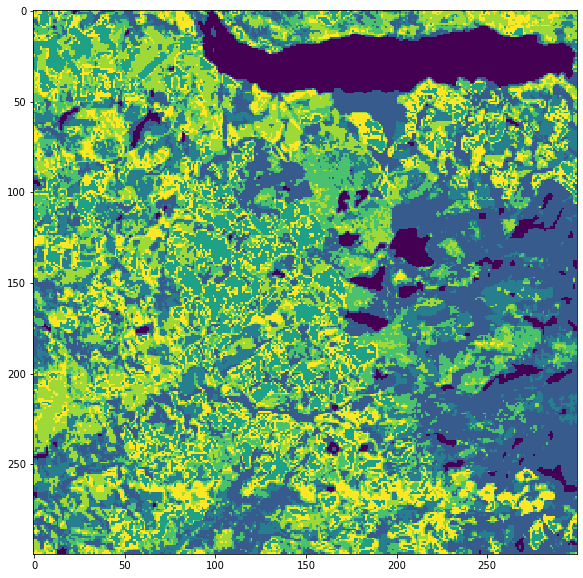

In [0]:
#Modified version of hierarchical clustering with recursive merging of differnet cluster objects
 #Compare Hierarchical Clustering Results to the truth data, (the given data in the provided raw image is not normalized)
  """
@author: gagandeepbajwa
    based on sattelite-clustering.py by @franama

""" 
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_extraction.image import grid_to_graph
import cv2
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from random import randint

#colab imorts
from google.colab import drive
from google.colab.patches import cv2_imshow # because cv2 doesnot work in colab

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

#defining gloab data
global_data=[]


broadLeaf_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/BROADLEAF_SP.tif_project_4x.bin_sub.bin"
ccutbl_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/CCUTBL_SP.tif_project_4x.bin_sub.bin"
conifer_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/CONIFER_SP.tif_project_4x.bin_sub.bin"
exposed_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/EXPOSED_SP.tif_project_4x.bin_sub.bin"
herb_grass_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/HERB_GRAS_SP.tif_project_4x.bin_sub.bin"
mixed_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/MIXED_SP.tif_project_4x.bin_sub.bin"
rivers_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/RiversSP.tif_project_4x.bin_sub.bin"
shrub_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/SHRUB_SP.tif_project_4x.bin_sub.bin"
water_sp="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/WATERSP.tif_project_4x.bin_sub.bin"
vri_s2_objid2="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/vri_s2_objid2.tif_project_4x.bin_sub.bin"
vri_s2_objid3="/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/vri_s3_objid2.tif_project_4x.bin_sub.bin"

'''
Function Description: Running heirarchical Clustering on the image

'''
def hierarchical_clustering(image, img, desired_clusters, threshold_1):

    print('Starting executing the heirarchical clustering')
    
    # set parameters for clustering
    n_clusters_desired = desired_clusters # need to experiment with this
    print('Going to run the heirarchical clustering')
    hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold=threshold_1, linkage='ward', compute_full_tree=True) #distance_threshold
    #hierarchical_clustering = AgglomerativeClustering(n_clusters = desired_clusters, linkage='ward') #distance_threshold

    # do the clustering
    hierarchical_clusteringl=hierarchical_clustering.fit(image)

    
    #plotting the dendrogram
    #plot_dendrogram(hierarchical_clustering, image)

    # extract cluster labels and reshape for plotting
    X_cluster = hierarchical_clustering.labels_
    X_cluster = X_cluster.reshape(img[:, :, 0].shape)

    plt.figure(figsize=(10, 10))
    #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    # Create the colormap
    #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    plt.imshow(X_cluster) #, cmap=cm)
    plt.colorbar()
    plt.show()


    # clr_cropped_img = np.zeros((img.shape[0], img.shape[1], 3))
    # for b in range(1,4):
    #     clr_cropped_img[:, :, 3-b] = img[:, :, b]

   # plt.figure(figsize=(10,10))
    
    # plt.imshow(clr_cropped_img)

    # returning the following values: number of clusters, lables, number of trees in the hierarchical tree
    #           number of connected components in the graph
    return hierarchical_clustering.n_clusters, hierarchical_clustering.labels_, hierarchical_clustering.n_leaves_, hierarchical_clustering.n_connected_components_



'''
Function Description: Running the DBSCAN
'''
def dbscan_clustering(image, img):
    
    dbscan_clustering = DBSCAN(eps=0.5, min_samples=10, algorithm= 'ball_tree')

    dbscan_clustering.fit(image)

    X_cluster = dbscan_clustering.labels_
    X_cluster = X_cluster.reshape(img[:, :, 0].shape)

    plt.figure(figsize=(20, 20))
    #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    # Create the colormap
    #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    plt.imshow(X_cluster) #, cmap=cm)
    plt.colorbar()
    plt.show()


'''
Function Description: Creating the colormap of the whole image by providing the cropped clustered data
'''    
def create_color_map(data, originalImageData, img, cropped_size, threshold_2):
    print('Starting creating the color map')

    #initializing the final_labels
    final_labels=data[0][1][:cropped_size]
    final_labels_ = [] #numpy array that will store final labels
    img_ = img
    data_ = data
    originalImageData_ = originalImageData.copy()
    cropped_size_ = cropped_size

    #Run Algorithm to merge the clusters
    merging_algorithm(img_, originalImageData_, final_labels_, data_, threshold_2)
  
'''
Function Description: Plotting Dendogram
'''
def plot_dendrogram(model, X):
    # Create linkage matrix and then plot the dendrogram
    distance, weight = get_distances(X,model)
  
    linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)

    plt.figure(figsize=(20,10))
    dendrogram(linkage_matrix)
    plt.show()
    k=randint(0,4)
    plt.savefig('/content/gdrive/My Drive/'+str(k))


'''
Function Description: compute the distance matrix
'''
def get_distances(X,model,mode='actual'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights




'''
Function Description: Run the merging algorithm 
'''
def merging_algorithm(image, cropped_images, final_labels, data, threshold_2, random_sampling=False, centroids=False):
    #LIst of cluster objects
    clusters=[]

    print("data length: ", len(data))
    
    print('Cropped_Images shape:   ', cropped_images[0].shape)

    cluster_nos = []
    indexes_for_clusters = []
    labels_in_cropped = [] #storing labels in the cropped image shape, so it will be easy to join them at the end

    #comparing the cluster objects and deciding whether two cluster objects need to be considered one or not
    for r in range(len(data)): # go through all the elements stored in the data object
        labels = data[r][1] # getting labels for individual cropped images
        #reshaping the labels into the cropped image shape
        labels_cr = labels.reshape(cropped_images[0][ :, :, 0].shape)
        #labels_cr = labels #just here for testing
        labels_in_cropped.append(labels_cr)
        cluster_nos.append(max(labels)) # appending the maximum number in labels means number of clusters in that cropped_image
        for k in range(max(labels)+1): # go through each of the cluster
            np_labels = np.array(labels_cr)
            indexes_f = np.where(np_labels==k) # get all the indexes of the occurrence of specific element in the numpy array
            i_cluster_values_ = []
            indexes = np.array((indexes_f[0], indexes_f[1])).T
            print(indexes)
            print(k, ' hello')
            print('Total number of indexes or values in given cluster: ',len(indexes))
            cropped_image_numbers=[] #for the implementation that each pixel now have individual identity to which cropped image ot belongs
            for ind in range(len(indexes)):
                i_cluster_values_.append(cropped_images[r][indexes[ind][0], indexes[ind][1]])
                cropped_image_numbers.append(r)
               
            i_cluster_values = np.array(i_cluster_values_) #.reshape(cropped_images[0].shape[0]*cropped_images[0].shape[1], cropped_images[0].shape[2])
            #print('cluster_vlaue we got: ', i_cluster_values.shape)
            clusters.append([i_cluster_values, 0]) # append all the cluster objects to the clusters list
            indexes_for_clusters.append([indexes, cropped_image_numbers, k]) # appending all the clusters's index and indexes of all the objects in that cluster we got from running heirarchical clustering on a cropped image

    #printing total number of cluster objects we found
    print("Total Number of clusters found: ",len(clusters))
    print("Maximum number of clusters found in the cropped images: ", max(cluster_nos))
    print(len(clusters[0][0]))

    #labels numbers user
    lnu = []

    #compared
    comparedp = 0

    magic_number = []

    for i in range(len(clusters)):
        magic_number.append(i)
    

    #starting comparing the clusters
    #for a in range(len(clusters)):
    a=0
    while a < len(clusters):     
        print('Number of clusters we have in the list of cluster objects: ', len(clusters))
        comparedp = 0 # re-initialize it to zero for each cluster a 
        for b in range(a,len(clusters)):
           
            if(a!=b and clusters[a][1] != 1 and clusters[b][1]!=1): # processed with the comparison only if both clusters are different
                print('Going to compare cluster ', a,' and ', b)
                cluster_a = clusters[a][0]
                cluster_b = clusters[b][0]
                a_b = np.concatenate((cluster_a, cluster_b))
                #now run the heirarchical clustering
                hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = threshold_2 , linkage='ward')  #distance threshold has been changed from 25 to 30, need to experiment with it

                # do the clustering
                hierarchical_clustering.fit(a_b)
                        
                # extract cluster labels and reshape for plotting
                cluster = hierarchical_clustering.labels_
                #printing total number of clusters found
                #print(max(cluster))
                percentages=[]#stores the percentages that will give me how much is the overla 
                cluster_percentages=[]
               
                #if we have overlapping clusters we have created the following variables
                new_cluster_values=[]
                new_cluster_indexes=[]

                magic_truth_percentages=[]
                for l in range(max(cluster)+1):
                    count = list(cluster).count(l)
                    total_length = cluster.shape[0]
                    indexes = np.array(np.where(cluster==l)).T #indexes that gets the cluster l   
                    print('shape of the indexes we got: ', indexes.shape) 

                    #get the new cluster's datapoints to push them into cluster object array for re-comparison
                    new_indexes=[]                 #print(indexes)
                    new_cluster_values_=[]
                    new_cluster_indexes_=[]
                    new_cropped_image_numbers_= []
                    no_in_a=0 
                    for k in indexes:
                      if(k[0]<cluster_a.shape[0]):
                        new_indexes.append([k[0], 0])
                        no_in_a+=1

                      else:
                        new_indexes.append([k[0]-cluster_a.shape[0], 1])#because the final labels we got are on the concated datapoints from two original clusters  
                    
                    for index in new_indexes:
                      
                      if(index[1]==0):
                        new_cluster_values_.append(cluster_a[index[0]])
                        new_cluster_indexes_.append(indexes_for_clusters[a][0][index[0]])
                        new_cropped_image_numbers_.append(indexes_for_clusters[a][1][index[0]])

                      else:
                        new_cluster_values_.append(cluster_b[index[0]])
                        new_cluster_indexes_.append(indexes_for_clusters[b][0][index[0]])
                        new_cropped_image_numbers_.append(indexes_for_clusters[b][1][index[0]])


                      

                    #append new data to the lists holding that data
                    new_cluster_indexes.append([new_cluster_indexes_, new_cropped_image_numbers_])
                    new_cluster_values.append(new_cluster_values_)

                    print(no_in_a)
                    no_in_b = count - no_in_a
                    percentages.append((no_in_b/count)*100)
                    percentages.append((no_in_a/count)*100)
                    cluster_percentages.append((count/total_length)*100)
                    magic_truth_percentages.append((((count/total_length)*100)*((no_in_b/count)*100))/100)
                    print(',\n\n\n\nNumber of data points that get cluster number ',l, ' is: ', count)
                    print('Its percentage in the total number of data points: ', (count/total_length)*100)
                    print('How many percentage of cluster b: ', b,' are ', (no_in_b/count)*100)
                    print('How many percentage of cluster a: ', a, ' are', (no_in_a/count)*100, '\n\n\n\n')


                #if(max(cluster)>=1):
                # magic_bool=True
                # step=0
                # for i in range(int(len(percentages)/2)):
                #   if(percentages[i+step]>20 or percentages[i+step]>20):
                #     magic_bool= False               
                #   step+=2
                print(magic_truth_percentages)
                print(cluster_percentages)
                print('List of Clusters We have ', magic_number)
                print('Total Number of clusters:', len(clusters))
                if(max(cluster)>=1):
                  if(max(percentages)==100 and min(percentages)==0 and percentages.count(100)==2 and percentages.count(0)==2):

                      print('Move on, they are different clusters', a, 'and ', b)
                    
                      #update the label numbers, because their label number may be acquired by some other clusters while merging, do this only when your cluster is unique
                      if(b==magic_number[len(magic_number)-1] and comparedp==0):
                          print('Cluster Number: ',a,' came out to be a lonely cluster')
                      
                          
                          
                          indexes_vtca = indexes_for_clusters[a][0]
                          values1=[]
                          for values in indexes_vtca:
                              if(len(lnu)==0):
                                  values1.append(0)
                              
                              else:
                                  values1.append(lnu[len(lnu)-1]+1)
                          
                          indlablesa = indexes_vtca
                          for inla in range(len(indexes_vtca)):
                              cropped_imgan = indexes_for_clusters[a][1][inla]
                              labels_in_cropped[cropped_imgan][indlablesa[inla][0], indlablesa[inla][1]] = values1[inla]
                          
                          if(len(lnu)==0):
                            lnu.append(0)
                          
                          else:
                            lnu.append(lnu[len(lnu)-1]+1) # this label number is already used
                            
                          #LIst of new clusters we have
                          print('List of clusters we have ',lnu)

                  else: #this means the clusters are overlapping
                    for i in range(max(cluster)+1):
                      #report the flag that these clusters have some noise and should not be compared further                   
                      print("New Cluster ", i , " got pushed to the clusters object list")
                      clusters.append([np.array(new_cluster_values[i]), 0])
                      indexes_for_clusters.append([new_cluster_indexes[i][0] ,new_cluster_indexes[i][1],  1])
                      #also add the magic number
                      magic_number.append(len(magic_number))


                    clusters[b][1]=1
                    clusters[a][1]=1

                else:
                    #increment the compared positive
                    comparedp+=1
                    print('Magic Number: ', magic_number) #informative print
                    clusters[b][1]= 1 #mark the cluster as done because we dont need to compare it with other clusters again
                    clusters[a][1]=1 # because now there combination should be compared instead of individual clusters
                    print('Something is here to think about', a, ' and ', b)
                    indexes_vtca = indexes_for_clusters[a][0] # indexes where values need to be changed
                    

                    indexes_vtcb = indexes_for_clusters[b][0] # indexes where values need to be changed
                   
                
                    
                    values2a=[]
                    for values in indexes_vtca:
                        if(len(lnu)==0):
                            values2a.append(0)
                        
                        else:
                            if(comparedp>1):
                                values2a.append(lnu[len(lnu)-1])
                            
                            else:
                                values2a.append(lnu[len(lnu)-1]+1)
                        
                    
                    values2b=[]
                    for values in indexes_vtcb:
                        if(len(lnu)==0):
                            values2b.append(0)
                        
                        else:
                            if(comparedp>1):
                                values2b.append(lnu[len(lnu)-1])
                            
                            else:
                                values2b.append(lnu[len(lnu)-1]+1)
                    
                    indlablesa = indexes_vtca
                    indlablesb = indexes_vtcb
                    for inla in range(len(indexes_vtca)):
                        cropped_imgan = indexes_for_clusters[a][1][inla]
                        labels_in_cropped[cropped_imgan][indlablesa[inla][0], indlablesa[inla][1]] = values2a[inla]
                    
                    for inlb in range(len(indexes_vtcb)):
                        #print(indexes_for_clusters[b][1][inlb][0])
                        cropped_imgbn = indexes_for_clusters[b][1][inlb]
                        labels_in_cropped[cropped_imgbn][indlablesb[inlb][0], indlablesb[inlb][1]] = values2b[inlb]

                    #pushing the combined cluster
                    clusters.append([np.concatenate((cluster_a, cluster_b)), 0])#push the combined datapoints
                    indexes_for_clusters.append([np.concatenate((indexes_for_clusters[a][0], indexes_for_clusters[b][0])) ,np.concatenate((indexes_for_clusters[a][1], indexes_for_clusters[b][1])),  1])
                    #also add the magic number
                    magic_number.append(len(magic_number))
                    if(comparedp==1):
                        lnu.append(values2a[0]) # this label number is already used
                    
                    print('List of clusters we have ',lnu)
                    #magic_number.remove(b) #add removed clusters to the magic_number list

                   
            
            #if the cluster is the last one
            else:
              if(a==magic_number[len(magic_number)-1] and comparedp==0):
                        print('Cluster Number: ',a,' came out to be a lonely cluster')
                    
                        
                        indexes_vtca = indexes_for_clusters[a][0]
                        values1=[]
                        for values in indexes_vtca:
                            if(len(lnu)==0):
                                values1.append(0)
                            
                            else:
                                values1.append(lnu[len(lnu)-1]+1)
                        
                        indlablesa = indexes_vtca
                        for inla in range(len(indexes_vtca)):
                            cropped_imgan = indexes_for_clusters[a][1][inla]
                            labels_in_cropped[cropped_imgan][indlablesa[inla][0], indlablesa[inla][1]] = values1[inla]
                        
                        
                        if(len(lnu)==0):
                            lnu.append(0)
                          
                        else:
                            lnu.append(lnu[len(lnu)-1]+1) # this label number is already used
                           
                        
                        print('List of clusters we have ',lnu)

                        break

        a+=1
              
    #       plt.figure(figsize=(7, 7))
    #       #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    #       # Create the colormap
    #       #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    #       plt.imshow(X_cluster) #, cmap=cm)
    #       plt.colorbar()
    #       plt.show()
                

    #join the cropped labels
    print('------------------------\nStarting Joining the Cropped Images\n----------------- ')
    #cropped Size
    cropped_size = 150

    csm = 0
    mastern = 0

    print('labels_in_cropped size: ', len(labels_in_cropped))


    print('Number of clusters found after running merging algorithm: ', len(lnu))


    for master in range(2):
    #     print('Mastern Value is: ', mastern)
        #after the new row is started initialize csm back to 0
        csm=0
        for x in range(cropped_size):
    #         print('x is: ', x)       
            for y in range(2):
    #           print('csm value is: ', csm)
    #           print("csm plus cropped size: ", csm + cropped_size)   
                #showing the cropped image with the new labels
    #           plt.figure(figsize=(5,5))
    #           plt.imshow(labels_in_cropped[y+mastern].reshape(196,196))
                #doing the appending operations
                data_= labels_in_cropped[y+mastern].reshape(cropped_size*cropped_size)  
                final_labels = np.concatenate((final_labels, data_[csm:csm+cropped_size]))
                #size of the final labels
        #           print(final_labels.shape)
                
                if(y==1):# when y i s6 change the csm to add 196 from each image
                    csm=csm+cropped_size
                
            if(x==149):
                    #changing the master number plus 7     
                    mastern = mastern + 2  
    

    print(image.shape)
    print(final_labels.shape)  
    
    #reshaping the final labels
    rfl = final_labels.reshape(300,300)

    print(rfl.shape)  
    
    print('Number of clusters found in the final image', max(final_labels)+1)

    # allocate memory to reshape image
    img_colored = np.zeros((400,  
                    400, 
                    3),  
                    gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) # data type code
    

    # for b in range(1,4):
    #     img_colored[:, :, 3-b] = img[0:392, 0:392, b]


    # plt.figure(figsize=(10, 10))
    # plt.imshow(img_colored) #show the colored image for the testing image of size 392, 392

    #plt.savefig('/content/gdrive/My Drive/cropped_img.png')
    # drive.download('cropped_image.png')
    
    #shwing the final image
    plt.figure(figsize=(10, 10))
    plt.imshow(rfl)
    #plt.colorbar() 
    #plt.savefig('/content/gdrive/My Drive/color_map.png')


'''
Function Description: Visualizing the data
Parameter: Data in particular format
'''
#def visualize(visualization_data):



'''
Function Description: Create an Individual Layer from the generated color map
'''
def create_individual_layer(c_no, colormap):
   colormap_ext =  np.zeros((colormap.shape[0], colormap.shape[1]))
   colormap_ext[:,:] = colormap[:,:]
   for index_x in range(colormap.shape[0]):
     for index_y in range(colormap.shape[1]):
       if(colormap_ext[index_x, index_y]==c_no):
         colormap_ext[index_x, index_y]=1
       
       else:
         colormap_ext[index_x, index_y]=0
   colors = [(0,0,0), (1,1,1)]
   cm = LinearSegmentedColormap.from_list("Map", colors, N=2)
   plt.figure(figsize=(10, 10))
   plt.imshow(colormap_ext, cmap=cm)
  #  plt.imsave(save_colormap_path+str(c_no)+".png", colormap_ext, cmap=cm )
   individual_layers.append(colormap_ext) # append individual layer created to the list, so that it can be used later to compare with the truth data

'''
Function Description: Compare classes created by unsupervised method to the truth data
'''
def compare(layer_type, cluster_n):
    l_ds = readRasterImage(layer_type)
    X, l_img = getInputMatrix(l_ds)
    print(X.shape)
    print(X[0,0])
    water_X=np.zeros((l_img.shape[0], l_img.shape[1]))
    water_X = X.reshape(l_img[:,:,0].shape) #truth_data layer
    layer_k = np.zeros((l_img.shape[0], l_img.shape[1]))
    layer_k = individual_layers[cluster_n] #layer generated from the k_means
    print('Unique values in the given truth layer: ',np.unique(water_X))
    for index_x in range(water_X.shape[0]):
      for index_y in range(water_X.shape[1]):
        if(water_X[index_x,index_y]==1.130000e+03):
          water_X[index_x,index_y]=0
        
        else:
          water_X[index_x,index_y]=1
    colors = [(0,0,0), (1,1,1)]
    cm = LinearSegmentedColormap.from_list("Map", colors, N=2)
    plt.figure(figsize=(10, 10))
    plt.imshow(water_X, cmap=cm)

    #get the stats
    stat(water_X, layer_k)

   

'''
Function Description : Return Stats over the layer generated from K-Means to the the truth data layer 
'''
def stat(truth_layer, generated_layer):
    #counters for the score
    true_positive=0
    true_negative=0
    false_negative=0
    false_positive=0

    for index_x in range(truth_layer.shape[0]):
      for index_y in range(truth_layer.shape[1]):
        if(truth_layer[index_x, index_y]==1 and generated_layer[index_x, index_y]==1):
          true_positive+=1
        elif(truth_layer[index_x, index_y]==1 and generated_layer[index_x, index_y]==0):
          false_negative+=1
        elif(truth_layer[index_x, index_y]==0 and generated_layer[index_x, index_y]==1):
          false_positive+=1
        elif(truth_layer[index_x, index_y]==0 and generated_layer[index_x, index_y]==0):
          true_negative+=1

    #compute the stats
    precision = true_positive/(true_positive+false_positive)
    print('Precision is:', precision*100, '%')

    recall = true_positive/(true_positive +false_negative)
    print('Recall is: ', recall*100, '%')

    iou = (true_positive + true_negative)/(true_positive + true_negative + false_negative + false_positive)
    print('Accuracy(IOU) is: ', iou*100, '%')

    print('True_Positive: ',true_positive)
    print('False_Positive: ',false_positive)
    print('True_Negative: ',true_negative)
    print('False_Negative: ',false_negative)


'''
Function Description: Splitting the main image
'''
def image_splitter(image, number, threshold_1, threshold_2):
    
    print('Starting the image splitting')
    #showing the original image
    #img=cv2.imread(image)
    img= image;
    #cv2.imshow('output', img) does not work witj colab
   # cv2_imshow(img)
    #cv2.waitKey(0)

    #Getting the size of the image
    img_height = img.shape[0]
    img_width = img.shape[1]
    
    #Size per cropped image
    #cropped_size = int(img.shape[0]/number) # as we have square images, this need to be changed according to the image dimensions

    cropped_size = 150
    # intitializing the array to store all the required information
    data = [];
    
    #initializing the array that will store numpy array objects of the cropped images
    original_data=[]

    #crop starter
    cs = 0
    cj_cs=0
    cj=0
    for i in range(2):
      
        cj=cj_cs
        cj_cs=cj_cs+cropped_size
        
        print('Y star reached ' ,cj)
        
        print('Y end reached ',cj_cs)
        
        #starting again from the left most
        cs=0
        
        for j in range(2):
          
            print('X start reached ', cs)
            
            print('X end reached ', cs+cropped_size)
          
            #cropping down the image
            crop_img = img[ cj:cj_cs,cs:cs+cropped_size ]

            #informative
            print('Number of rows in the cropped image: ',crop_img.shape[0])
            print('Number of columns in the cropped image: ', crop_img.shape[1])
            print('Number of bands in the cropped image: ', crop_img.shape[2])


            #initialize an empty numpy array of cropped image size
            np_crop_img =  np.zeros((crop_img.shape[0],  # number of rows
                            crop_img.shape[1],  # number of cols
                            crop_img.shape[2])  # number of bands
                            )


            #store the image data in the numpy array for reshaping
            for b in range(crop_img.shape[2]):
                np_crop_img[:,:,b] = crop_img[:,:,b]   

            #convert the image to single to numpy array
            new_crop_img_shape = (np_crop_img.shape[0]*np_crop_img.shape[1], np_crop_img.shape[2])
            crop_img_X = np_crop_img[:,:,:np_crop_img.shape[2]].reshape(new_crop_img_shape)
            print(crop_img_X.shape)
                        
            #before running heirarchical clustering find the number of appropriate clusters in the cropped image
            ap_clusters_possible=elbow_method(crop_img_X, 7) #7 is the maximum number of clusters found in the whole image using elbow method

            # showing the cropped image
            #before showing the cropped image we only need 3 bands
            clr_cropped_img = np.zeros((crop_img.shape[0], crop_img.shape[1], 3))
            for b in range(1,4):
              clr_cropped_img[:, :, 3-b] = crop_img[:, :, b]
            
            #display the image
            plt.figure(figsize=(5, 5))
            plt.imshow(clr_cropped_img)
        
            #cv2_imshow(crop_img)

            #Runninng hierarchical clustering on the cropped image and  receiving the 
            (n_cluster, lables, n_leaves, n_connected_components )=hierarchical_clustering(crop_img_X, crop_img,7, threshold_1 )

            #pushing the cropped image numpy array to the image_data array
            original_data.append(crop_img)

            #pushing the data to the data array for further interpretation
            data.append((n_cluster, lables, n_leaves, n_connected_components ))

            print('Number of clusters found: ', n_cluster)
            print('Labels: ', lables)
            print('Number of leaves: ', n_leaves)
            print('Number of connected components: ', n_connected_components )

            #increment the crop starter
            cs=cs+cropped_size

            #show the cropped image
            #cv2.imshow("its cropped",crop_img)
            #cv2.waitKey(0)
    

    #printing totla number of clustered cities we get
    print('Total number of different clustered cropped images we got: ', len(data))
    
    #create the color map
    create_color_map(data, original_data, img, cropped_size, threshold_2)




"""
Plots number of clusters vs. within cluster sum of squares
(which we aim to minimize)
"""
def elbow_method(image_2d, max_k):
    wcss = []
    for i in range(2, max_k):
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        random_state=42)
        kmeans.fit(image_2d)
        wcss.append(kmeans.inertia_)

    x = [i for i in range(2, max_k)]
    plt.plot(x, wcss, '--bo')
    plt.xticks(x, x)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    #after plotting the elbow find the corner point


'''
Function Description: Display an imag
'''
def dendogram(f):
    # f =  np.array([[1,1],[3,3],[6,6],[5,5],[10,10], [15,15]])
 #
    hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold=6, linkage='ward')
    hierarchical =hierarchical_clustering.fit(f)
    plot_dendrogram(hierarchical, f)


'''
Function Description: Main Function
'''

if __name__ == "__main__":
    

    drive.mount('/content/gdrive')
    # parse command line arg
    try:
        #!cp '/content/gdrive/My Drive/2019-10-2-111855.png' image
        image = '/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/S2A.bin_4x.bin_sub.bin'   #trying it with the 12 band original image
        #image = '/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/BROADLEAF_SP.tif_project_4x.bin_sub.bin'
        
    # catch no file given
    except IndexError:
        print("Must provide a filename")
        sys.exit(0)

    #with the same image create multiple images
    
    # Read in raster image
    img_ds = gdal.Open(image, gdal.GA_ReadOnly)

    # allocate memory to reshape image
    img = np.zeros((img_ds.RasterYSize,  # number of rows
                    img_ds.RasterXSize,  # number of cols
                    img_ds.RasterCount),  # number of bands
                    gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) # data type code

    # reshape the image band by band
    for b in range(img.shape[2]):
        print("reading band", b + 1, "of", img.shape[2])
        print('Band Type: ', img_ds.GetRasterBand(b+1).DataType)
        img[:, :, b] = normalize(img_ds.GetRasterBand(b + 1).ReadAsArray(), norm='l2', copy=True)  # normalizing the values for each band using sklearn.preprocessing.normalize, where available norm types are 'l1', 'l2', and 'max', by default the norm is 'l2s'
        # img[:,:, b] = StandardScaler(copy=True, with_mean=True,
        #                     with_std=True).fit_transform(img_ds.GetRasterBand(b + 1).ReadAsArray())
        print('Max value in band', b,' is ', np.amax(img[:,:,b]))


    #Printing the shape of the image
    print(img.shape[0]*img.shape[1])
    print(img.shape[0])
    print(img.shape[1])
    print('Image Raster Count: ', img.shape[2])

    # normalize the data
    # image_ = StandardScaler(copy=True, with_mean=True,
    #                          with_std=True).fit_transform(img)
    #Downsampling the image before reshaping
   #img = img[::2, ::2] + img[1::2, ::2] + img[::2, 1::2] + img[1::2, 1::2]

    #new_img = img[0:400,0:400]  #get sub images out of the original images

    # reshape image again to match expected format for scikit-learn
    new_shape = (img.shape[0] * img.shape[1], img.shape[2])
    X = img[:, :, :img.shape[2]].reshape(new_shape)
    print (X.shape[0])


    clr_cropped_img = np.zeros((img.shape[0], img.shape[1], 3))
    for b in range(1,4):
        clr_cropped_img[:, :, 3-b] = img[:, :, b]

    plt.figure(figsize=(10,10))
    
    plt.imshow(clr_cropped_img)


    

    #running the hierarchical clustering
    #hierarchical_clustering(X, new_img, 7)

    #runnig the DBSCAN
    #dbscan_clustering(X, img)

    #running image splitting
    #image_splitter(image, 7)
    image_splitter(img,7, 3, 3)
    #image_splitter(new_img, 7)
    # f =  np.array([[1,1],[3,3],[6,6],[5,5],[10,10], [15,15]])
    # f1 = np.array([[1,1],[6,6],[10,10],[15,15]])
    # f2 = np.array([[3,3],[5,5]])
    # dendogram(f)
    # dendogram(f1)
    # dendogram(f2)
    # f1f2 = np.array([[15,15],[1,1]])
    # f1f3 = np.array([[15,15],[6,6], [10,10]])
    # f1f4 = np.array([[15,15],[3,3],[5,5]])
    # dendogram(f1f2)
    # dendogram(f1f3)
    # dendogram(f1f4)
    # f2f3 = np.array([[1,1],[6,6],[10,10]])
    # f2f4 = np.array([[1,1], [3,3], [5,5]])
    # dendogram(f2f3)
    # dendogram(f2f4)
    # f3f4 = np.array([[6,6],[15,15],[3,3],[5,5],[1,1]])
    # dendogram(f3f4)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
reading band 1 of 12
Band Type:  6
Max value in band 0  is  1.1583978
reading band 2 of 12
Band Type:  6
Max value in band 1  is  1.1977509
reading band 3 of 12
Band Type:  6
Max value in band 2  is  1.2716699
reading band 4 of 12
Band Type:  6
Max value in band 3  is  1.3782097
reading band 5 of 12
Band Type:  6
Max value in band 4  is  1.4405855
reading band 6 of 12
Band Type:  6
Max value in band 5  is  1.4439238
reading band 7 of 12
Band Type:  6
Max value in band 6  is  1.3650502
reading band 8 of 12
Band Type:  6
Max value in band 7  is  1.3332789
reading band 9 of 12
Band Type:  6
Max value in band 8  is  1.3703054
reading band 10 of 12
Band Type:  6
Max value in band 9  is  6.04698
reading band 11 of 12
Band Type:  6
Max value in band 10  is  1.213244
reading band 12 of 12
Band Type:  6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Max value in band 11  is  1.340416
1882384
1372
1372
Image Raster Count:  12
153664


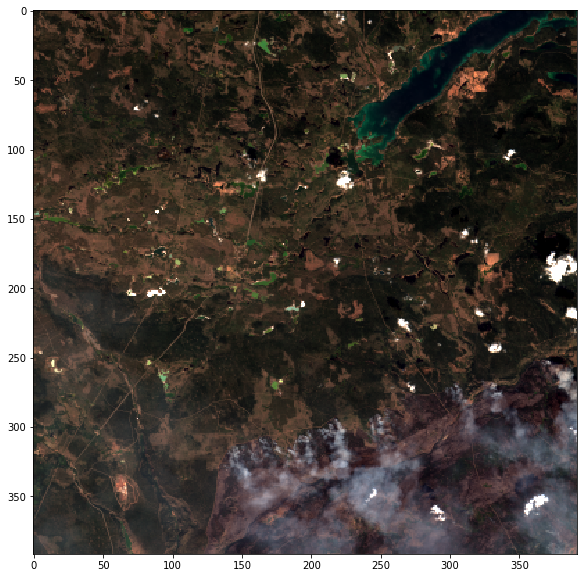

In [0]:
import sys
import time
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_extraction.image import grid_to_graph
import cv2
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

#colab imorts
from google.colab import drive
from google.colab.patches import cv2_imshow # because cv2 doesnot work in colab

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

def rescale(arr, two_percent=True):
    """

    """
    arr_min = arr.min()
    arr_max = arr.max()
    scaled = (arr - arr_min) / (arr_max - arr_min)

    if two_percent:
        # 2%-linear stretch transformation for hi-contrast vis
        values = copy.deepcopy(scaled)
        values = values.reshape(np.prod(values.shape))
        values = values.tolist()
        values.sort()
        npx = len(values)  # number of pixels
        if values[-1] < values[0]:
            print('error: failed to sort')
            sys.exit(1)
        v_min = values[int(math.floor(float(npx)*0.02))]
        v_max = values[int(math.floor(float(npx)*0.98))]
        scaled -= v_min
        rng = v_max - v_min
        if rng > 0.:
            scaled /= (v_max - v_min)

    return scaled


if __name__ == "__main__":
    

    drive.mount('/content/gdrive')
    # parse command line arg
    try:
        #!cp '/content/gdrive/My Drive/2019-10-2-111855.png' image
        image = '/content/gdrive/My Drive/sentinel2.bin'   #trying it with the 12 band original image
        #image = '/content/gdrive/My Drive/Truth_Data/20190926kamloops_data/BROADLEAF_SP.tif_project_4x.bin_sub.bin'
        
    # catch no file given
    except IndexError:
        print("Must provide a filename")
        sys.exit(0)

    #with the same image create multiple images
    
    # Read in raster image
    img_ds = gdal.Open(image, gdal.GA_ReadOnly)

    # allocate memory to reshape image
    img = np.zeros((img_ds.RasterYSize,  # number of rows
                    img_ds.RasterXSize,  # number of cols
                    img_ds.RasterCount),  # number of bands
                    gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) # data type code

    # reshape the image band by band
    for b in range(img.shape[2]):
        print("reading band", b + 1, "of", img.shape[2])
        print('Band Type: ', img_ds.GetRasterBand(b+1).DataType)
        img[:, :, b] = rescale(np.array(img_ds.GetRasterBand(b + 1).ReadAsArray()))  # normalizing the values for each band using sklearn.preprocessing.normalize, where available norm types are 'l1', 'l2', and 'max', by default the norm is 'l2s'
        # img[:,:, b] = StandardScaler(copy=True, with_mean=True,
        #                     with_std=True).fit_transform(img_ds.GetRasterBand(b + 1).ReadAsArray())
        print('Max value in band', b,' is ', np.amax(img[:,:,b]))


    #Printing the shape of the image
    print(img.shape[0]*img.shape[1])
    print(img.shape[0])
    print(img.shape[1])
    print('Image Raster Count: ', img.shape[2])


    new_img = img[0:392,0:392]  #get sub images out of the original images

    # reshape image again to match expected format for scikit-learn
    new_shape = (392 * 392, img.shape[2])
    X = new_img[:, :, :img.shape[2]].reshape(new_shape)
    print (X.shape[0])


    clr_cropped_img = np.zeros((392, 392, 3))
    for b in range(1,4):
        clr_cropped_img[:, :, 3-b] = new_img[:, :, b]

    plt.figure(figsize=(10,10))
    
    plt.imshow(clr_cropped_img)




